Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [5]:
df = pd.read_csv('train.csv')

print("Info about columns:")
print(df.info())

Info about columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

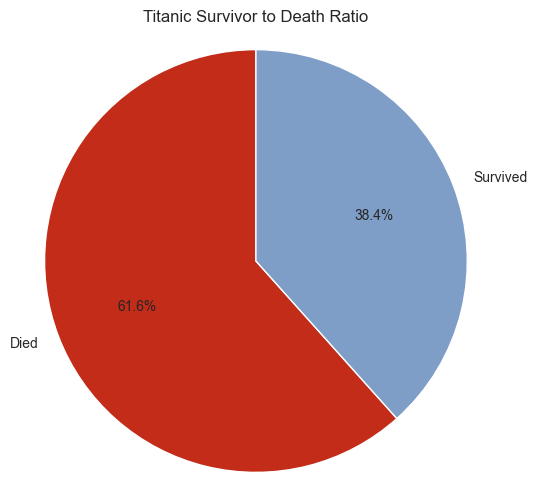

In [14]:
survival_counts = df['Survived'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Died', 'Survived'], autopct='%1.1f%%', colors=['#C22C18', '#7F9EC7'], startangle=90)
plt.title('Titanic Survivor to Death Ratio')
plt.axis('equal')
plt.show()

Кругова діаграма pie chart чітко показує, що більшість пасажирів не вижили. Візуалізація проста і зрозуміла. Я обрала червоний колір для загиблих і синій для виживших, аби допомогти швидко розрізнити категорії.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


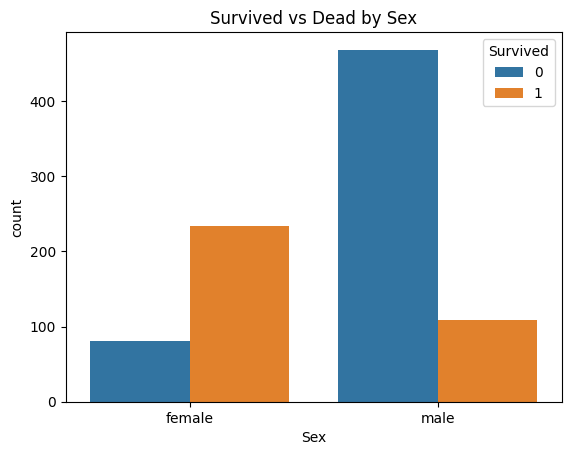

<Figure size 800x600 with 0 Axes>

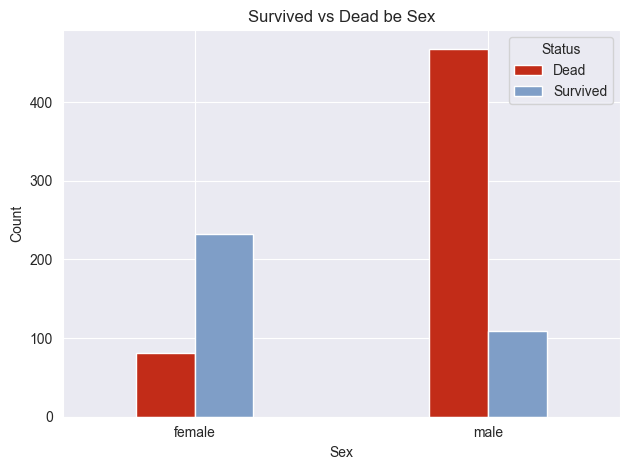

In [17]:
survival_by_sex = df.groupby(['Sex', 'Survived'], as_index=False).size()

pivot_data = survival_by_sex.pivot(index='Sex', columns='Survived', values='size').fillna(0)
pivot_data.columns = ['Dead', 'Survived']


plt.figure(figsize=(8, 6))
pivot_data.plot(kind='bar', color=['#C22C18', '#7F9EC7'], width=0.4)
plt.title('Survived vs Dead be Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Графік чітко показує різницю між смертністю за статтю пасажирів. Жінки мали набагато вищий рівень виживання проти чоловіків. На мою думку, на такі результати вплинули дві речі. 1. Політика пріоритету жінок та дітей під час евакуації, що було типово для ситуації в тих роках. 2. Той факт що жінок взагалі було менше на борту.

Використання as_index=False у groupby забезпечило зручний формат даних для подальшого аналізу та побудови графіку.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

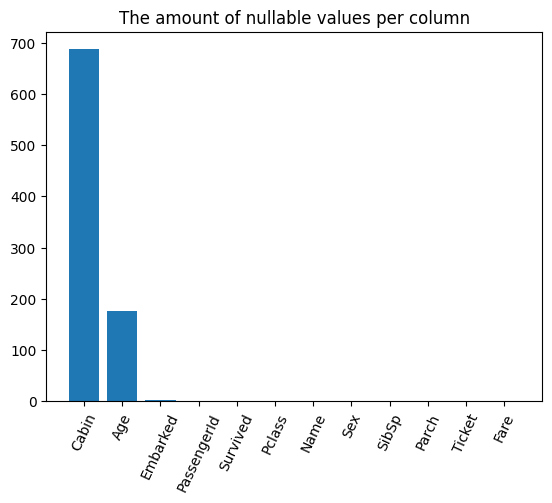

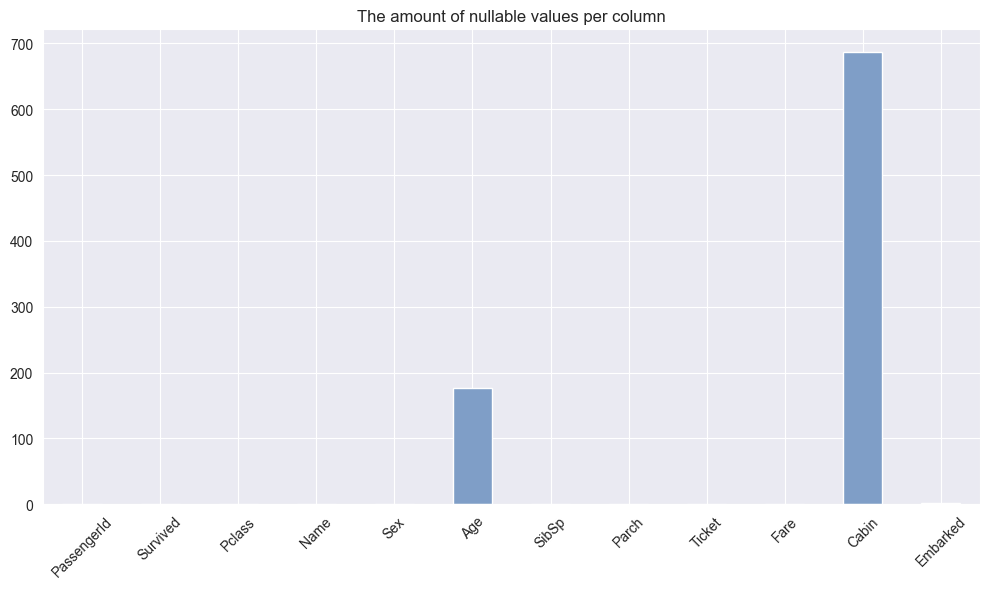

The amount of nullable values per column:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [20]:
missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='#7F9EC7')
plt.title('The amount of nullable values per column')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The amount of nullable values per column:")
print(missing_values[missing_values > 0])

Графік показує, що найбільше пропущених значень у колонці Cabin (687 із 891 записів), що становить приблизно 77% даних. Це може ускладнити аналіз, пов’язаний із розташуванням кают. Колонка Age має 177 пропущених значень (~20%), що також суттєво, але менш критично. Колонка Embarked має лише 2 пропуски, що майже не впливає на аналіз, порівняно до інших двох категорій.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

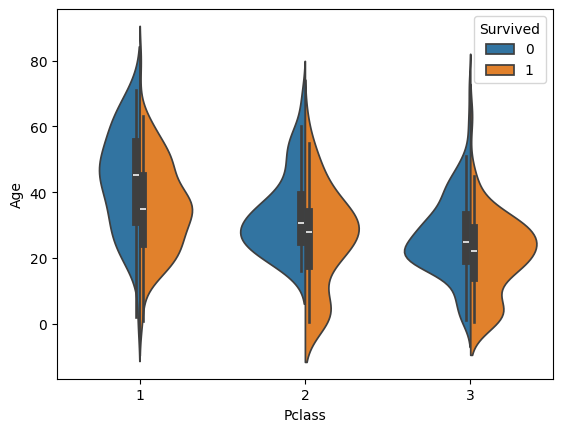

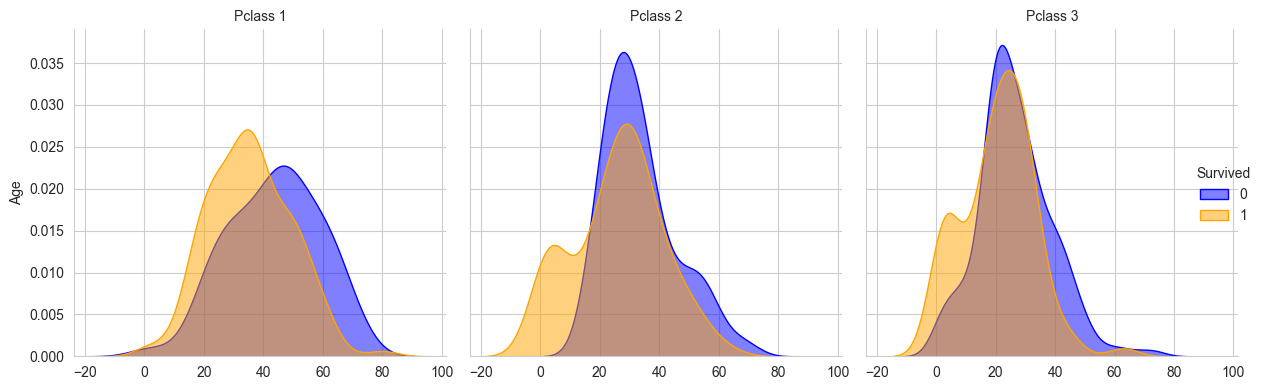

In [28]:
df_age = df.dropna(subset=['Age'])

sns.set_style("whitegrid")

g = sns.FacetGrid(df_age, col="Pclass", hue="Survived", height=4, aspect=1, palette={0: "blue", 1: "orange"})

g.map_dataframe(sns.kdeplot, x="Age", fill=True, alpha=0.5)

g.set_axis_labels("", "Age")
g.set_titles("Pclass {col_name}")
g.add_legend(title="Survived")
plt.tight_layout()
plt.show()

У мене не вийшло зробити ідентичний графік...

Але ось все одно аналіз даних:
Графік ефективно показує взаємозв’язок між віком, класом і виживанням. Синій і помаранчевий кольори чітко розрізняють категорії, а розподіл за Pclass дозволяє порівняти тенденції між класами. Пропуски в колонці Age (177 значень) були виключені перед побудовою, що зменшило розмір даних до 714 записів, але це необхідно для коректного аналізу.

У першому класі (Pclass=1) вижилі пасажири мають ширший віковий діапазон, що може вказувати на те, що соціальний статус допомагав виживати людям різного віку, включаючи старших.
У другому класі (Pclass=2) розподіл віку для вижилих і не вижилих більш схожий.
У третьому класі (Pclass=3) більшість не вижилих — молоді люди (20-30 років), що підтверджує низький рівень виживання в цьому класі.


6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


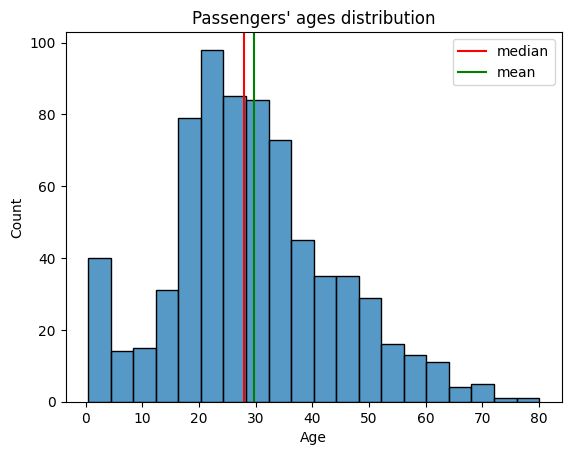

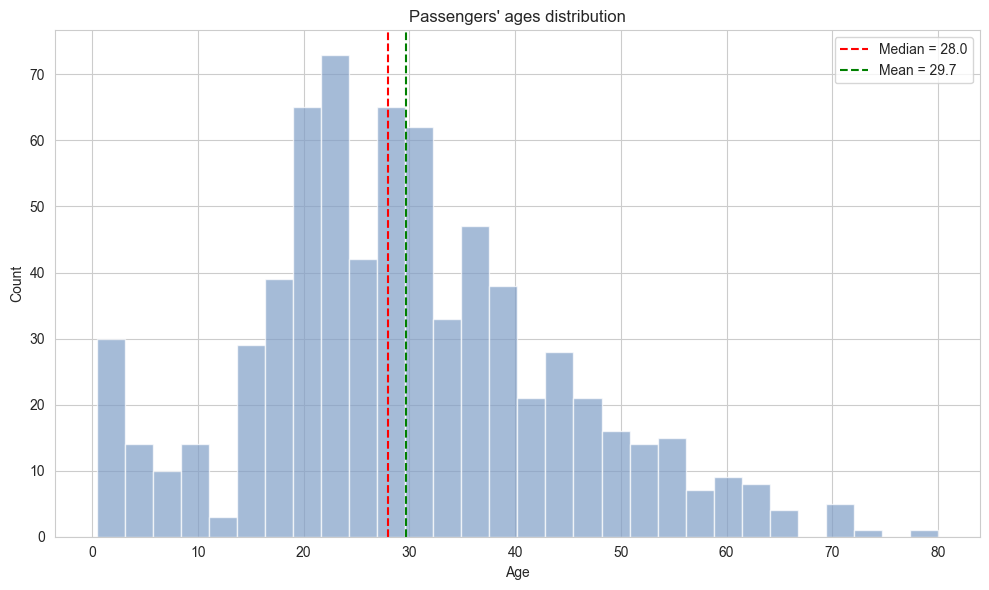

Median age: 28.0
Mean age: 29.69911764705882


In [31]:
median_age = df['Age'].median()
mean_age = df['Age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='#7F9EC7', alpha=0.7)
plt.axvline(median_age, color='red', linestyle='--', label=f'Median = {median_age:.1f}')
plt.axvline(mean_age, color='green', linestyle='--', label=f'Mean = {mean_age:.1f}')
plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Median age: {median_age}")
print(f"Mean age: {mean_age}")

Розподіл віку скошений вправо: більшість пасажирів — молоді люди віком 20-40 років, із піком близько 20-30 років. Напевно це типово для подорожей того часу, коли молоді люди частіше подорожували.
Є кілька пасажирів старше 60 років, але їх мало, що підтверджує невелику частку літніх людей на борту.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як клас каюти (Pclass) впливав на ймовірність виживання пасажирів? Чи мали пасажири першого класу вищі шанси вижити порівняно з другим і третім класами?

<Figure size 800x600 with 0 Axes>

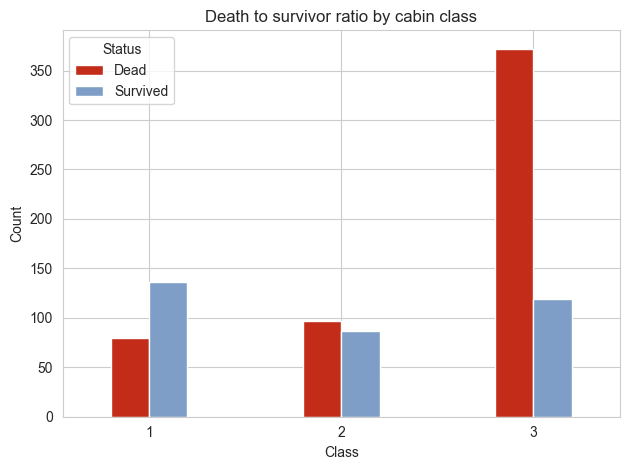

In [33]:
survival_by_class = df.groupby(['Pclass', 'Survived'], as_index=False).size()

pivot_class = survival_by_class.pivot(index='Pclass', columns='Survived', values='size').fillna(0)
pivot_class.columns = ['Dead', 'Survived']

plt.figure(figsize=(8, 6))
pivot_class.plot(kind='bar', color=['#C22C18', '#7F9EC7'], width=0.4)
plt.title('Death to survivor ratio by cabin class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

Графік показує, що пасажири першого класу мали значно вищі шанси вижити (136 вижили проти 80 загиблих), тоді як у третьому класі більшість загинула (372 загиблих проти 119 вижили). Другий клас займає проміжну позицію (97 загиблих, 87 вижили).
На мою думку, на такі числа впливає, по-перше, те, що в першому класі було найменше людей (це дорогий і максимально комфортний клас) а в третьому - найбільше, так як на нього найдешевші квитки. Також на результати може впливати розміщення кают - перший клас, як найдорожчий, скоріше всього має пріоритетну безпеку, адже за нього найбільше платять.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

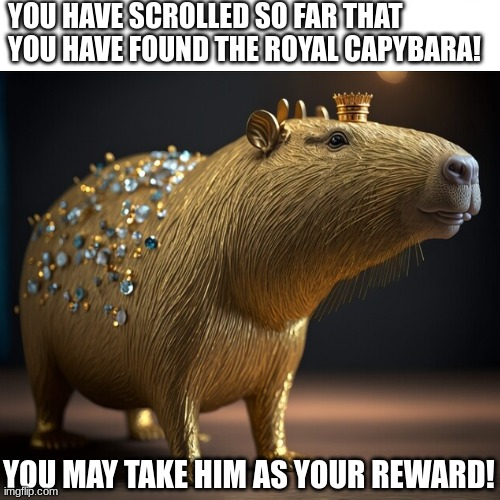